<a id='top'></a>

# CSCI3022 F21
# Homework 4: Bayes and Discrete RVs
***

**Name**: Nathan Shaver

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 27 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (15 pts) Problem 1: Bayes and Additional Information



In or marbles-in-bags examples in class and in notebook 5, we asked a question about drawing marbles from bags with uneven distributions of marbles inside.  The question we often want to ask is "how can we figure out which bag we had when all we observe is the marbles drawn?"

Our Pokédex is pretty great since we've collected lots of Pokémon. Enough that when we battle our friends, we don't even bother to think about what we choose.  Instead, we:

1) Pick a **generation** of Pokémon at random, with all 4 outcomes equally likely

2) Choose any one of our Pokémon of that generation to battle (each equally likely among the total options)

3) If we battle again, we again choose one of our available Pokémon of the *same* generation chosen in step 1), possibly even the same Pokémon in step 2).

Inside our Pokédex is the following:

- From generation 1, 9 total: 3 Water types, 3 Poison types (Koffings, of course), 2 Fire types, 1 Electric Type
- From generation 2, 14 total: 9 Water types (all Mudkips), 3 Fire types, 1 Electric Types, 1 Dragon Type
- From generation 3, 7 total: 1 Grass type, 2 Fire types, 1 Electric Type, 3 Dragon types
- From generation 4, 6 total: 2 Water types, 2 Fire Types, 2 Electric Types


**Part A**:

Suppose we battle a single friend once.  What is the exact probability that we use a Water Type, $P(W_1)$?

**Part A Answer:**

Probability of using a Water Type = $P(W_1)$ 

Each generation has an equally likely chance of being picked. Within each generation, the probability of picking a water type is respectively: $(3/9)$, $(9/14)$, $(0/7)$, $(2/6)$

Thererfore, 

$P(W_1) = (.25) * \frac{3}{9} + (.25) * \frac{9}{14} + (.25) * \frac{0}{7} + (.25) * \frac{2}{6}$

$P(W_1) = (.25) * (\frac{3}{9} + \frac{9}{14} + \frac{0}{7} + \frac{2}{6})$

$P(W_1) = .3274$ or $32.74$%

In [2]:
#function that returns true if a water pokemon is picked
def pokepicker(gen1, gen2, gen3, gen4):
    genlist = np.array([1, 2, 3, 4])

    genRandom = np.random.choice(genlist) # picks a random generation
    if(genRandom == 1):
        getRandPoke = np.random.choice(gen1) #picks a random pokemon from that generation
        totalWater = (getRandPoke == "W") #if the pokemon is a water type, return true
    elif(genRandom == 2):
        getRandPoke = np.random.choice(gen2)
        totalWater = (getRandPoke == "W")
    elif(genRandom == 3):
        getRandPoke = np.random.choice(gen3)
        totalWater = (getRandPoke == "W")
    elif(genRandom == 4):
        getRandPoke = np.random.choice(gen4)
        totalWater = (getRandPoke == "W")
        
    return totalWater
        
gen1 = np.array(["W", "W", "W", "P", "P", "P", "F", "F", "E"])
gen2 = np.array(["W", "W", "W", "W", "W", "W", "W", "W", "W", "F", "F", "F", "E", "D"])
gen3 = np.array(["G", "F", "F", "E", "D", "D", "D"])
gen4 = np.array(["W", "W", "F", "F", "E", "E"])

print("The probability of picking a water pokemon on the first battle is", sum(pokepicker(gen1, gen2, gen3, gen4)for _ in range(5000))/5000)

The probability of picking a water pokemon on the first battle is 0.3304


**Part B**:

Suppose we battle a single friend once, and we used a Water Type.  Given this, what is the exact probability that we were using a generation 2 Pokémon, or $P(2| W_1)$?

$P(2) = .25$

$P(W_1) = .3274$

$P(W_1|2) = .6428$

Applying Bayes theorem:

$P(2|W_1) = \frac{P(W_1|2) * P(2)}{P(W_1)}$

$P(2|W_1) = \frac{.6428 * .25}{.3274}$

$P(2|W_1) = .4908$ or $49.08$%

In [3]:
#function that returns true if a water pokemon is picked and returns true if the water pokemon was from generation 2
def gen2Checker(gen1, gen2, gen3, gen4):
    genlist = (1,2,3,4)
    totalWater2 = False
    getRandom = np.random.choice(genlist) #picks a random generation
    if(getRandom == 1):
        getRandPoke = np.random.choice(gen1) #picks a random pokemon from that generation
        totalWater = (getRandPoke == "W")
    elif(getRandom == 2):
        getRandPoke = np.random.choice(gen2) 
        totalWater2 = (getRandPoke == "W") #if it is a water type, return true
        totalWater = (getRandPoke == "W") #if it is a water type and from generation 2 return true
    elif(getRandom == 3):
        getRandPoke = np.random.choice(gen3)
        totalWater = (getRandPoke == "W")
    elif(getRandom == 4):
        getRandPoke = np.random.choice(gen4)
        totalWater = (getRandPoke == "W")
    
    return totalWater2, totalWater

gen1 = np.array(["W", "W", "W", "P", "P", "P", "F", "F", "E"])
gen2 = np.array(["W", "W", "W", "W", "W", "W", "W", "W", "W", "F", "F", "F", "E", "D"])
gen3 = np.array(["G", "F", "F", "E", "D", "D", "D"])
gen4 = np.array(["W", "W", "F", "F", "E", "E"])

print("The exact probability given we have picked a water type, that we are in generation 2 is" ,sum(gen2Checker(gen1,gen2,gen3,gen4)[0]for _ in range(10000)) / sum(gen2Checker(gen1,gen2,gen3,gen4)[1]for _ in range(10000)))
#print("The probability of picking a water pokemon on the first battle is", sum(gen2Checker(gen1, gen2, gen3, gen4)[0]for _ in range(5000))/5000)

The exact probability given we have picked a water type, that we are in generation 2 is 0.4984577421344849


**Part C**:

Are the events $2$ for "used a second generation Pokémon" and $W_1$ for "used a Water Pokémon in our first battle" independent?  Why or why not.



**Part C Answer**

Yes, they are independent because getting a water type is not dependent on choosing the second generation and choosing the second generation is not dependent on choosing a water type.


**Part D**:

Suppose we decide to battle 3 times in a row against the same opponent and we end up with a Water Type all 3 times.  What is the probability that all 3 Pokémon are Water Type?  **Given** that all 3 Pokémon were Water Type, which generation do you think you selected at random?  Justify with an exact probability of *each* generation.


**Part D Answer**

Probability of using a Water Type 3 times in a row= $P(W_3)$ 

Each generation has an equally likely chance of being picked. Within each generation, the probability of picking a water type is respectively: $(3/9)$, $(9/14)$, $(0/7)$, $(2/6)$. 

Within each generation, the probability of picking a water type on the second battle is respectively: $(2/8)$, $(8/13)$, $(0/6)$, $(1/5)$.

Within each generation, the probability of picking a water type on the third battle is respectively: $(1/7)$, $(7/12)$, $(0/5)$, $(0/4)$.

Thererfore, 

$P(W_3) = ((.25) * \frac{3}{9} * \frac{3}{9} * \frac{3}{9}) + ((.25) * \frac{9}{14} * \frac{9}{14} * \frac{9}{14}) + ((.25) * \frac{0}{7} * \frac{0}{7} * \frac{0}{7}) + ((.25) * \frac{2}{6} * \frac{2}{6} * \frac{2}{6})$

$P(W_3) = ((.25) * \frac{1}{84}) + ((.25) * \frac{3}{13})$

**$P(W_3) = .08493$ or $8.493$%**

Given that there are no water types in generation 3, it is impossible for 3 water types to be chosen. Therefore their probabilities of being selected at random given that all 3 are water types is 0. Let the probability of a generation being selected at random given that all 3 chosen are water types be $P(1|W_3)$ and $P(2|W_3)$ $P(4|W_3)$ for generations 1 and 2 and 4 respectively.

$P(1) = .25$

$P(W_3) = .08493$

$P(W_3|1) = \frac{3}{9} * \frac{3}{9} * \frac{3}{9} = .0370$

Applying Bayes Theorem:

$P(1|W_3) = \frac{P(W_3|1) * P(1)}{P(W_3)}$

$P(1|W_3) = \frac{.0370 * .25}{.08493}$

$P(1|W_3) = .10891$

$P(2) = .25$

$P(W_3) = .08493$

$P(W_3|2) = \frac{9}{14} * \frac{9}{14} * \frac{9}{14} = .26567$

Applying Bayes Theorem:

$P(2|W_3) = \frac{P(W_3|2) *P(2)}{P(W_3)}$

$P(2|W_3) = .26567 * .25 / .08493$

$P(2|W_3) = .78202$

$P(4) = .25$

$P(W_3) = .08493$

$P(W_3|4) = \frac{2}{6} * \frac{2}{6} * \frac{2}{6} = .03704$

Applying Bayes Theorem:

$P(4|W_3) = \frac{(PW_3|4) *P(4)}{P(W_3)}$

$P(4|W_3) = \frac{.03704 * .25}{.08493}$

$P(4|W_3) = .10903$

**Therefore,**

$P(1|W_3) = .10891$

$P(2|W_3) = .78202$

$P(3|W_3) = 0$

$P(4|W_3) = .10903$

I believe I selected generation 2 at random since generation 2 has the highest probability.

**Part E**:  

First, work out **by hand** a formula for the probability in general that you currently are using generation 2 Pokémon, given that you used a Water Type for $n$ battles in a row.

Then, define a function `prob_gen2` to calculate $P(2 \mid (W_1\cap W_2 \cap \dots \cap W_n))$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.  Then create a line plot where the $x$ axis is $n$ (from 0 to 20) and the y-axis is $P(2|\text{"used a water type n times in a row"})$

Applying Bayes theroem:

$P(2 | W_1 \cap W_2 \cap$ ... $ \cap W_n)) = \frac{P(W_n | 2) * P(2}{P(W_n)*P(1) + P(W_n) * P(2) + P(W_n) * P(3) + P(W_n) * P(4)}$

$P(2 | W_1 \cap W_2 \cap$ ... $ \cap W_n)) = \frac{\frac{9}{14}^n * \frac{1}{4}}{\frac{3}{8}^n * \frac{1}{4} + \frac{9}{14}^n * \frac{1}{4} + \frac{0}{7}^n * \frac{1}{4} + \frac{2}{6}^n * \frac{1}{4}}$

Probablity we are in generation 2 given we have picked 3 water types in a row 0.7819713161972112


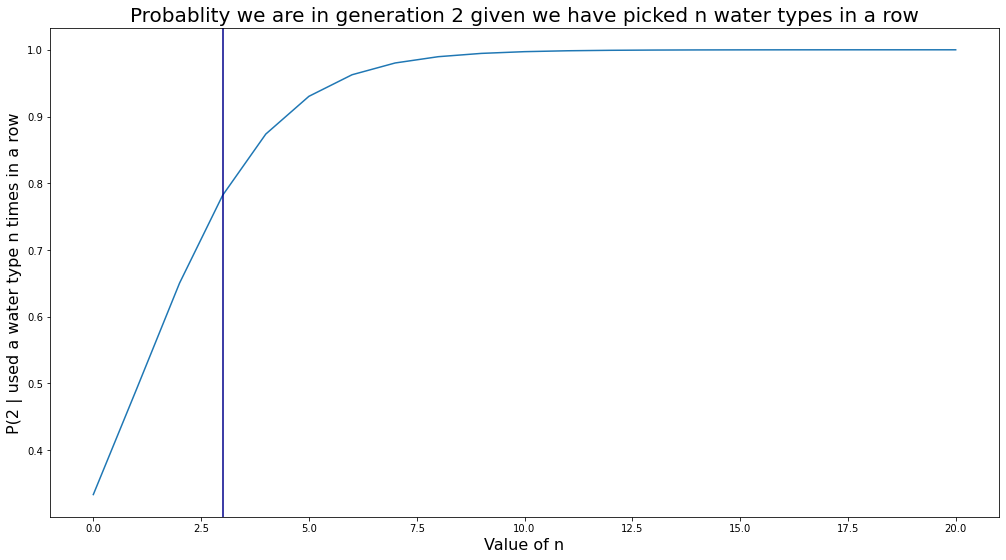

In [11]:
#function that returns the probability of picking generation 2 given we have picked n water types in a row
def gen2prob(n):
    numerator = ((9/14) ** n) * (1/4)
    denominator = (((3/9) ** n) * (1/4)) + numerator + (((2/6) ** n) * (1/4))
    final = numerator / denominator
    return final

print("Probablity we are in generation 2 given we have picked 3 water types in a row", gen2prob(3))

#plotting an array of results in a histogram
histogram = np.array([])
i =0
while i <= 20:
    histogram = np.append(histogram, gen2prob(i))
    i = i + 1
    
fig, ax = plt.subplots(1,1, figsize=(17,9))
plt.plot(histogram)
ax.set_xlabel("Value of n", fontsize=16)
ax.set_ylabel("P(2 | used a water type n times in a row", fontsize=16)
ax.set_title("Probablity we are in generation 2 given we have picked n water types in a row", fontsize=20)
plt.axvline(3, color = 'darkblue')

[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2 (Theory): Making a pdf
***


Suppose we devise the following die-rolling game.

1) Roll a fair 6-sided die, and record the face `x` as your score.

2) Then roll `x` more fair 6-sided dice, and add their faces to your original score `x`.

Denote your final score by the random variable $Y$, and the pdf of $Y$ by $f(y)$.

**Part A**: Compute by hand the *exact* probability that $Y=5$, or $f(5)$.

Each side of the die has an equally likely chance of being rolled: $1/6$. When a 1 is rolled, the only possible combination of Y = 5 is rolling a 1 => 4. When a 2 is rolled, the only possible combinations of getting a 5 is rolling a  2 => 1 => 2 or a 2 => 2 => 1. It is impossible for Y = 5 when a 3 or higher is rolled, because the minimum value to roll is a 1. So 3 => 1 => 1 => 1 exceeds 5. Therefore the probability of rolling a $f(5)$ is equal to:

$f(5) = (1/6 * 1/6) + (1/6 * 2/36) + (1/6 * 0/216) + (1/6 * 0/1296) + (1/5 * 7776) + (1/6 * 46656)$

$f(5) = (1/36) + (2/216)$

$f(5) = .0370$ or $3.70$%

**Part B**: Use a simulation to generate the approximate pdf $f(y)$ over all possible outcomes.  Display that pdf as a histogram. Print the approximated value of $f(5)$ to check your work in **A**

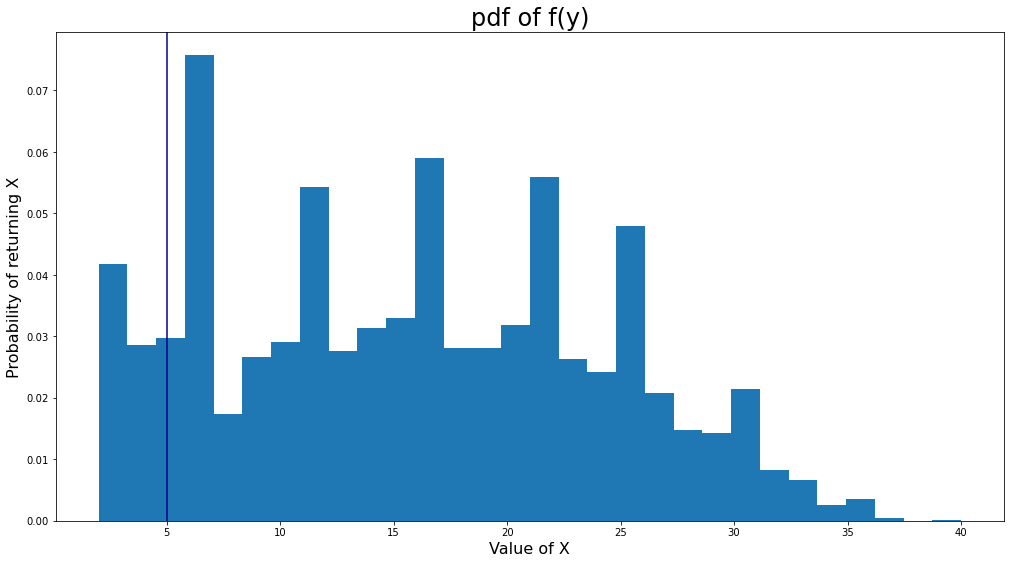

In [5]:
from matplotlib import pyplot as plt
#function that returns the sum of the game given above
def roll_die(x):
    i = 1
    initialroll = np.random.choice(x)
    rollincrement = initialroll
    #rolls the die i more times
    while i <= initialroll:
        newroll = np.random.choice(x)
        rollincrement = rollincrement + newroll
        i = i + 1
    return(rollincrement)

#stores the data in an array and plots it as a density histogram
diehist = []
j = 0
while j < 4000:
    diehist.append([roll_die(np.array([1,2,3,4,5,6]))])
    j = j + 1
    
finalHist = np.array(diehist)
fig, ax = plt.subplots(1,1, figsize=(17,9))
ax.hist(finalHist, bins = 30, density = True)
ax.set_xlabel("Value of X", fontsize=16)
ax.set_ylabel("Probability of returning X", fontsize=16)
ax.set_title("pdf of f(y)", fontsize=24)
plt.axvline(5, color = 'darkblue')

**Part C**: Use your simulations in part B to generate the approximate cdf $F(y)$ over all possible outcomes.  Display that cdf as a line plot (e.g. via `plt.plot`).

Text(0.5, 1.0, 'CDF of f(y)')

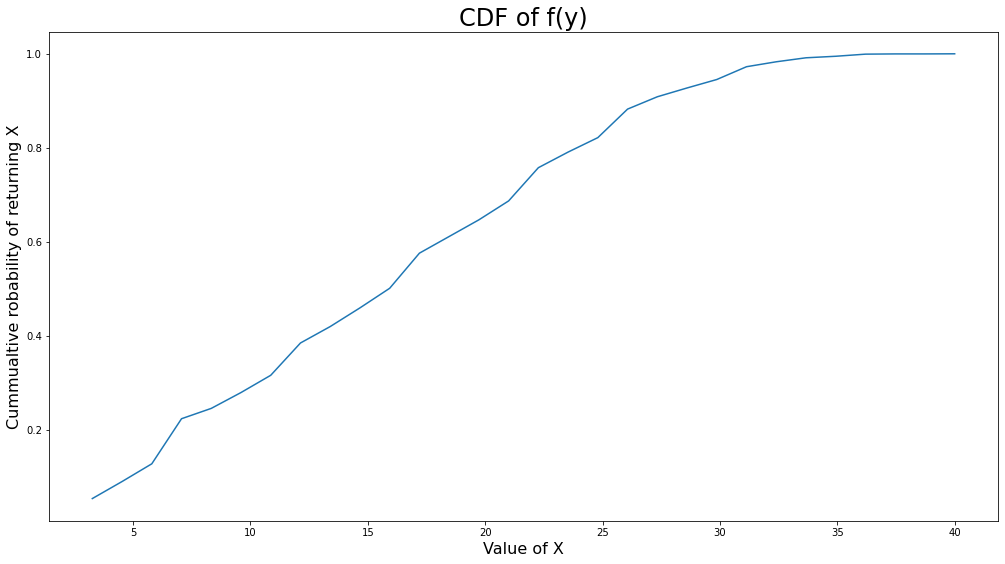

In [6]:
#making a cdf using a pdf from earlier
count, bins = np.histogram(diehist, bins=30)

pdf = count / sum(count)
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
fig, ax = plt.subplots(1,1, figsize=(17,9))
plt.plot(bins[1:], cdf, label="CDF")
ax.set_xlabel("Value of X", fontsize=16)
ax.set_ylabel("Cummualtive robability of returning X", fontsize=16)
ax.set_title("CDF of f(y)", fontsize=24)

[Back to top](#top)
<a/ id='p3'></a>

## (15 pts) How's the weather?
***
Suppose that we're interested in exploring how patterns in weather express themselves.  The file `boulderjuly90s.txt` imported below has the *counts* of days above 90 degrees from July 1949-2021.  See [here](https://psl.noaa.gov/boulder/) for source.

In [7]:
days=pd.read_csv('/home/jovyan/3022/hw/hw4/boulderjuly90s.csv')
days.head(10)

,Year,JUL
0,1949,15
1,1950,7
2,1951,21
3,1952,19
4,1953,14
5,1954,24
6,1955,25
7,1956,16
8,1957,15
9,1958,7


**Part A**:

Perform the usual initial explorations of data.  Ensure that there are no missing or fill values, check the size/shape of the data frame, and generate a line plot with the $x$ axis as year and the $y$ axis as days above 90 in that year's July.

Do there appear to be any patterns in the number of days over time?

Year    int64
JUL     int64
dtype: object
(73, 2)


Text(0.5, 1.0, 'Number of days over 90 in July the past 70 years')

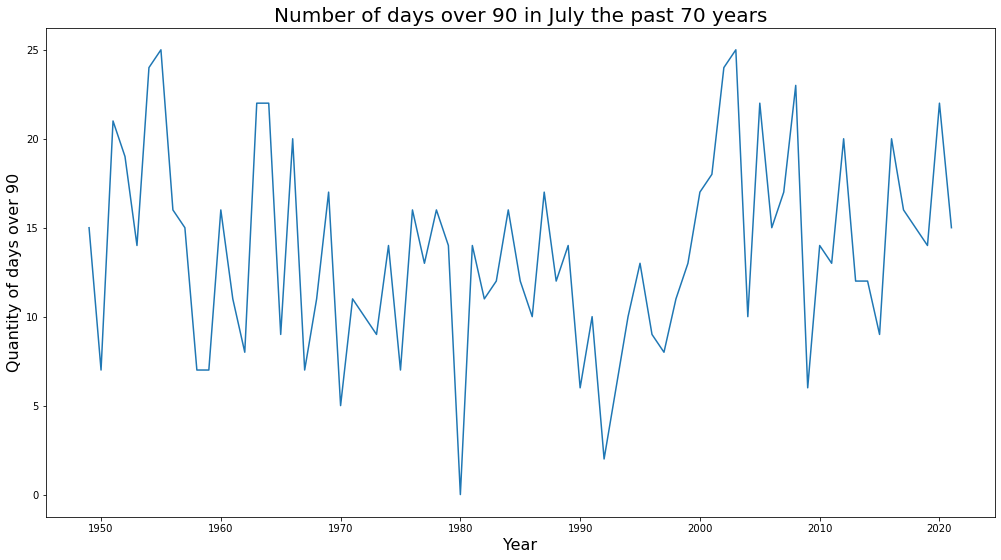

In [8]:
print (days.dtypes)
print (days.shape)
days = days.dropna()

fig, ax = plt.subplots(1,1, figsize=(17,9))

x = days["Year"]
y = days["JUL"]

plt.plot(x,y)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Quantity of days over 90", fontsize=16)
ax.set_title("Number of days over 90 in July the past 70 years", fontsize=20)

**Part B**:

Compute the average number of days in a July that are over 90, then divide by 31 to get the overall *probability* that any given day in July is over 90.  Suppose this is the "true" value $p$ of an underlying *Bernoulli* random variable.

If the days of any given July are actually **independent**, then each July should be 31 independent such Bernoulli random variables.  Using the relevant `scipy.stats` functions, answer the following:

"If each day is independent of one another and probability $p$ of being above 90 degrees, what is the probability that 20 or more days in July are above 90 degrees?"

Compare your theoretical result to the number of July's that actually had 20 or more days above 90 from `days`.

In [9]:
from scipy.stats import binom
#finds the total amount of days over 90, finds the average and then the probability of that occuring
avg = np.sum(days).values[1]
avg = avg / 73
prob = avg / 31
print("The probability any given day in July is over 90 is", prob)
prob20 = len(days.loc[days['JUL'] >= 20]) / 73
print("The probability 20 or more days in July are above 90 degrees is", prob20)

The probability any given day in July is over 90 is 0.43879805567830316
The probability 20 or more days in July are above 90 degrees is 0.1780821917808219


**Part C**:

Create a two part plot for the counts of the days-in-July-over-90.  The first is the histograms of the true values in `days`, the second is the theoretical value from the pmf of the underlying process if each day within the months was independent and identically distributed.  Overlay the pmf as a line on top of the histogram.  Do they visually appear to be coming from the same distribution?

The pmf and the histogram visually appear to come from the same distribution and data. This is due to their similar shape, spread and density.


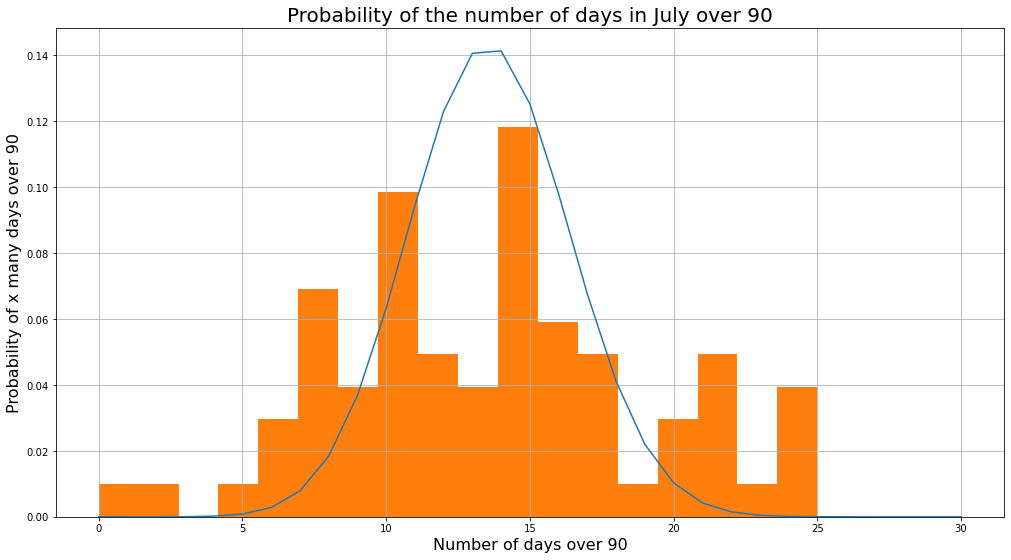

In [10]:
x = days["Year"]
y = days["JUL"]
fig, ax = plt.subplots(1,1, figsize=(17,9))

#storing the outcomes as a linspace
outcomes = np.linspace(0, 30, 31)
#plotting the linspace and the true values on the same graph
plt.plot(outcomes, stats.binom.pmf(outcomes, 31, prob))
days.hist(column="JUL", ax=ax, bins = 18, density = True);
ax.set_xlabel("Number of days over 90", fontsize=16)
ax.set_ylabel("Probability of x many days over 90", fontsize=16)
ax.set_title("Probability of the number of days in July over 90", fontsize=20)

print("The pmf and the histogram visually appear to come from the same distribution and data. This is due to their similar shape, spread and density.")

**Part D**:

Draw a conclusion.  What possible causes could you find for your results in **C** for the similarities and/or differences between the two distributions?

The probability pmf is a series of probabilities that a quantity of days are over 90. This is pulled from a Bernoulli random variable. The histogram is the raw data of how many days were over 90. It makes sense that these two graphs are similar because the probability cmf was calculated from the original data. This also indicates that the original data and histogram are a set of mostly random numbers with no distinct trends.